In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scs
import joblib
import yaml
import matplotlib.pyplot as plt

## 1. Import Params

In [2]:
params_dir = "config/config.yaml"

In [3]:
def load_params(param_dir):
    with open(param_dir, 'r') as file:
        params = yaml.safe_load(file)
        
    return params

In [4]:
params = load_params(params_dir)

In [5]:
params

{'raw_dataset_file': 'data/raw/ar-2015-2016-xlsb.xlsb',
 'train_set_path': ['data/processed/x_train.pkl',
  'data/processed/y_train.pkl'],
 'valid_set_path': ['data/processed/x_valid.pkl',
  'data/processed/y_valid.pkl'],
 'test_set_path': ['data/processed/x_test.pkl', 'data/processed/y_test.pkl'],
 'train_feng_set_path': ['data/processed/x_train_feng.pkl',
  'data/processed/y_train_feng.pkl'],
 'valid_feng_set_path': ['data/processed/x_valid_feng.pkl',
  'data/processed/y_valid_feng.pkl'],
 'test_feng_set_path': ['data/processed/x_test_feng.pkl',
  'data/processed/y_test_feng.pkl'],
 'raw_dataset_path': 'data/processed/raw_dataset.pkl',
 'cleaned_raw_dataset_path': 'data/processed/raw_dataset.pkl',
 'production_model_path': 'models/production_model.pkl',
 'training_log_path': 'log/training_log.json',
 'print_debug': True,
 'int32_columns': ['total_number_of_previous_ivf_cycles',
  'total_number_of_ivf_pregnancies',
  'total_number_of_di_pregnancies',
  'total_number_of_live_births_con

## 2. Load Train Set

In [6]:
x_train = joblib.load("data/processed/x_train.pkl")
y_train = joblib.load("data/processed/y_train.pkl")

In [7]:
x_train

,patient_age_at_treatment,total_number_of_previous_ivf_cycles,total_number_of_ivf_pregnancies,total_number_of_live_births_conceived_through_ivf,type_of_infertility_female_primary,type_of_infertility_female_secondary,type_of_infertility_male_primary,type_of_infertility_male_secondary,type_of_infertility_couple_primary,type_of_infertility_couple_secondary,...,cause_of_infertility_partner_sperm_morphology,causes_of_infertility_partner_sperm_motility,cause_of_infertility_partner_sperm_immunological_factors,stimulation_used,fresh_cycle,frozen_cycle,eggs_thawed,fresh_eggs_collected,eggs_mixed_with_partner_sperm,embryos_transfered
54320,18 - 34,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
113003,18 - 34,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
102142,18 - 34,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,15,15,0
25450,18 - 34,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,24,0,0
10759,18 - 34,2,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,6,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100569,43-44,3,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,1
86857,18 - 34,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,17,16,2
156415,35-37,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
58418,18 - 34,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,8,4,2


In [8]:
y_train

54320     0
113003    0
102142    0
25450     0
10759     0
         ..
100569    0
86857     1
156415    0
58418     1
138482    0
Name: live_birth_occurrence, Length: 109287, dtype: int64

In [9]:
dataset = pd.concat([x_train, y_train], axis = 1)

In [10]:
dataset

,patient_age_at_treatment,total_number_of_previous_ivf_cycles,total_number_of_ivf_pregnancies,total_number_of_live_births_conceived_through_ivf,type_of_infertility_female_primary,type_of_infertility_female_secondary,type_of_infertility_male_primary,type_of_infertility_male_secondary,type_of_infertility_couple_primary,type_of_infertility_couple_secondary,...,causes_of_infertility_partner_sperm_motility,cause_of_infertility_partner_sperm_immunological_factors,stimulation_used,fresh_cycle,frozen_cycle,eggs_thawed,fresh_eggs_collected,eggs_mixed_with_partner_sperm,embryos_transfered,live_birth_occurrence
54320,18 - 34,1,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,2,0
113003,18 - 34,1,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
102142,18 - 34,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,15,15,0,0
25450,18 - 34,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,24,0,0,0
10759,18 - 34,2,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,6,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100569,43-44,3,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,1,0
86857,18 - 34,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,17,16,2,1
156415,35-37,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
58418,18 - 34,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,8,4,2,1


## 3. EDA

### 3.1. Cek Missing Value

In [11]:
# cek null value
dataset.isnull().sum()

patient_age_at_treatment                                    0
total_number_of_previous_ivf_cycles                         0
total_number_of_ivf_pregnancies                             0
total_number_of_live_births_conceived_through_ivf           0
type_of_infertility_female_primary                          0
type_of_infertility_female_secondary                        0
type_of_infertility_male_primary                            0
type_of_infertility_male_secondary                          0
type_of_infertility_couple_primary                          0
type_of_infertility_couple_secondary                        0
cause_of_infertility_tubal_disease                          0
cause_of_infertility_ovulatory_disorder                     0
cause_of_infertility_male_factor                            0
cause_of_infertility_patient_unexplained                    0
cause_of_infertility_endometriosis                          0
cause_of_infertility_cervical_factors                       0
cause_of

### 3.2. Cek Informasi Statistik

#### 3.2.1. Cek Skewness

In [12]:
# cek skewness
dataset.skew(numeric_only = True)

total_number_of_previous_ivf_cycles                           1.447935
total_number_of_ivf_pregnancies                               2.792413
total_number_of_live_births_conceived_through_ivf             2.848873
type_of_infertility_female_primary                           16.607364
type_of_infertility_female_secondary                         25.678105
type_of_infertility_male_primary                             17.122563
type_of_infertility_male_secondary                           26.160273
type_of_infertility_couple_primary                           16.174931
type_of_infertility_couple_secondary                         30.384000
cause_of_infertility_tubal_disease                            2.574240
cause_of_infertility_ovulatory_disorder                       2.407756
cause_of_infertility_male_factor                              0.688332
cause_of_infertility_patient_unexplained                      1.011109
cause_of_infertility_endometriosis                            3.862264
cause_

#### 3.2.2. Pemisahan Dataset berdasarkan Kelas

In [13]:
# pisahkan menjadi 2 kelas untuk melihat apakah kita perlu melakukan imputasi berdasarkan kelas
dataset_berhasil = dataset[dataset.live_birth_occurrence == 1].copy()
dataset_gagal = dataset[dataset.live_birth_occurrence != 1].copy()

In [14]:
# kelas 1
dataset_berhasil.describe()

,total_number_of_previous_ivf_cycles,total_number_of_ivf_pregnancies,total_number_of_live_births_conceived_through_ivf,type_of_infertility_female_primary,type_of_infertility_female_secondary,type_of_infertility_male_primary,type_of_infertility_male_secondary,type_of_infertility_couple_primary,type_of_infertility_couple_secondary,cause_of_infertility_tubal_disease,...,causes_of_infertility_partner_sperm_motility,cause_of_infertility_partner_sperm_immunological_factors,stimulation_used,fresh_cycle,frozen_cycle,eggs_thawed,fresh_eggs_collected,eggs_mixed_with_partner_sperm,embryos_transfered,live_birth_occurrence
count,26657.000000,26657.000000,26657.000000,26657.000000,26657.000000,26657.000000,26657.000000,26657.000000,26657.000000,26657.000000,...,26657.000000,26657.0,26657.000000,26657.000000,26657.000000,26657.000000,26657.000000,26657.000000,26657.000000,26657.0
mean,1.180816,0.201486,0.146341,0.002513,0.001463,0.002588,0.001163,0.002738,0.001013,0.111791,...,0.000075,0.0,0.640957,0.670668,0.294519,0.065761,6.959785,6.061822,1.370522,1.0
std,1.470734,0.463672,0.377673,0.050072,0.038222,0.050812,0.034082,0.052260,0.031810,0.315114,...,0.008662,0.0,0.479729,0.469979,0.455835,0.840921,7.029614,6.341154,0.573897,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,1.000000,0.000000,0.000000,6.000000,5.000000,1.000000,1.0
75%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,1.000000,1.000000,0.000000,12.000000,10.000000,2.000000,1.0
max,6.000000,6.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,23.000000,49.000000,51.000000,3.000000,1.0


In [15]:
# kelas 0
dataset_gagal.describe()

,total_number_of_previous_ivf_cycles,total_number_of_ivf_pregnancies,total_number_of_live_births_conceived_through_ivf,type_of_infertility_female_primary,type_of_infertility_female_secondary,type_of_infertility_male_primary,type_of_infertility_male_secondary,type_of_infertility_couple_primary,type_of_infertility_couple_secondary,cause_of_infertility_tubal_disease,...,causes_of_infertility_partner_sperm_motility,cause_of_infertility_partner_sperm_immunological_factors,stimulation_used,fresh_cycle,frozen_cycle,eggs_thawed,fresh_eggs_collected,eggs_mixed_with_partner_sperm,embryos_transfered,live_birth_occurrence
count,82630.000000,82630.000000,82630.000000,82630.000000,82630.000000,82630.000000,82630.000000,82630.000000,82630.000000,82630.000000,...,82630.0,82630.0,82630.000000,82630.000000,82630.000000,82630.000000,82630.000000,82630.000000,82630.000000,82630.0
mean,1.225185,0.174271,0.121167,0.003933,0.001525,0.003631,0.001549,0.004115,0.001101,0.103026,...,0.0,0.0,0.669152,0.691178,0.232688,0.055863,5.976728,4.766707,0.992388,0.0
std,1.563948,0.443609,0.349183,0.062592,0.039020,0.060146,0.039328,0.064014,0.033168,0.303994,...,0.0,0.0,0.470521,0.462011,0.422548,0.757669,7.156635,6.198736,0.825857,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,1.000000,1.000000,0.000000,0.000000,4.000000,2.000000,1.000000,0.0
75%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,1.000000,1.000000,0.000000,0.000000,10.000000,8.000000,2.000000,0.0
max,6.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,1.000000,1.000000,1.000000,32.000000,51.000000,51.000000,3.000000,0.0


#### 3.2.3. Visualisasi untuk fitur total_number_of_previous_ivf_cycles

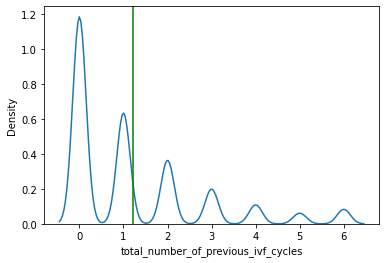

In [16]:
sns.kdeplot(data = dataset, x = "total_number_of_previous_ivf_cycles")
plt.axvline(dataset.total_number_of_previous_ivf_cycles.mean(), 0, 1, color = "g");

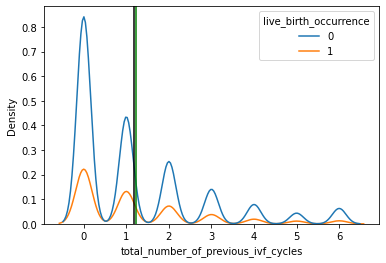

In [17]:
sns.kdeplot(data = dataset, x = "total_number_of_previous_ivf_cycles", hue = "live_birth_occurrence")
plt.axvline(dataset_gagal.total_number_of_previous_ivf_cycles.mean(), 0, 1, color = "g")
plt.axvline(dataset_berhasil.total_number_of_previous_ivf_cycles.mean(), 0, 1, color = "k");

#### 3.2.4. Visualisasi untuk fitur total_number_of_ivf_pregnancies

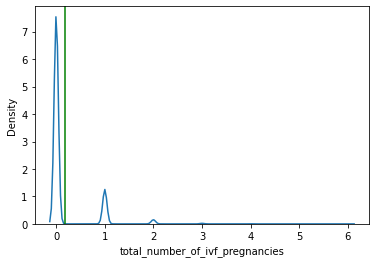

In [18]:
sns.kdeplot(data = dataset, x = "total_number_of_ivf_pregnancies")
plt.axvline(dataset.total_number_of_ivf_pregnancies.mean(), 0, 1, color = "g");

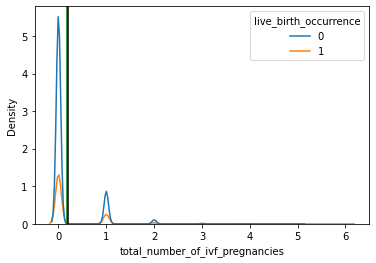

In [19]:
sns.kdeplot(data = dataset, x = "total_number_of_ivf_pregnancies", hue = "live_birth_occurrence")
plt.axvline(dataset_gagal.total_number_of_ivf_pregnancies.mean(), 0, 1, color = "g")
plt.axvline(dataset_berhasil.total_number_of_ivf_pregnancies.mean(), 0, 1, color = "k");

#### 3.2.5. Visualisasi untuk fitur total_number_of_live_births_conceived_through_ivf

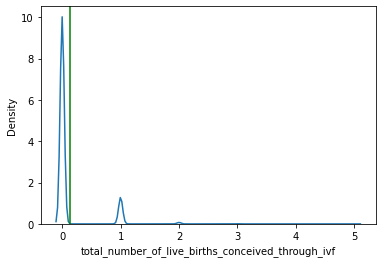

In [20]:
sns.kdeplot(data = dataset, x = "total_number_of_live_births_conceived_through_ivf")
plt.axvline(dataset.total_number_of_live_births_conceived_through_ivf.mean(), 0, 1, color = "g");

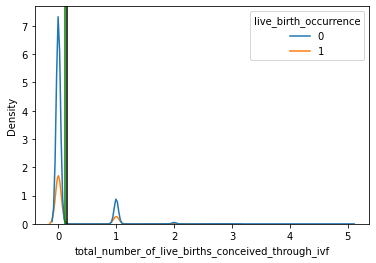

In [21]:
sns.kdeplot(data = dataset, x = "total_number_of_live_births_conceived_through_ivf", hue = "live_birth_occurrence")
plt.axvline(dataset_gagal.total_number_of_live_births_conceived_through_ivf.mean(), 0, 1, color = "g")
plt.axvline(dataset_berhasil.total_number_of_live_births_conceived_through_ivf.mean(), 0, 1, color = "k");

#### 3.2.6. Visualisasi untuk fitur stimulation_used

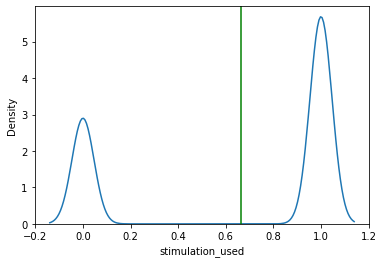

In [22]:
sns.kdeplot(data = dataset, x = "stimulation_used")
plt.axvline(dataset.stimulation_used.mean(), 0, 1, color = "g");

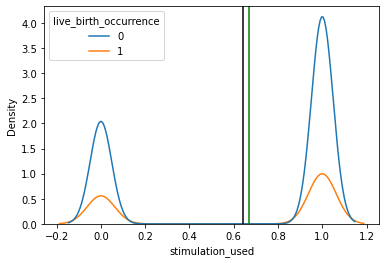

In [23]:
sns.kdeplot(data = dataset, x = "stimulation_used", hue = "live_birth_occurrence")
plt.axvline(dataset_gagal.stimulation_used.mean(), 0, 1, color = "g")
plt.axvline(dataset_berhasil.stimulation_used.mean(), 0, 1, color = "k");

#### 3.2.7. Visualisasi untuk fitur fresh_cycle

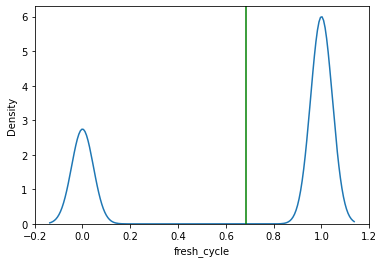

In [24]:
sns.kdeplot(data = dataset, x = "fresh_cycle")
plt.axvline(dataset.fresh_cycle.mean(), 0, 1, color = "g");

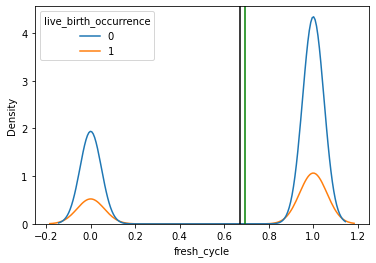

In [25]:
sns.kdeplot(data = dataset, x = "fresh_cycle", hue = "live_birth_occurrence")
plt.axvline(dataset_gagal.fresh_cycle.mean(), 0, 1, color = "g")
plt.axvline(dataset_berhasil.fresh_cycle.mean(), 0, 1, color = "k");

#### 3.2.8. Visualisasi untuk fitur frozen_cycle

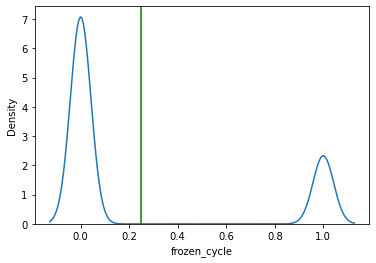

In [26]:
sns.kdeplot(data = dataset, x = "frozen_cycle")
plt.axvline(dataset.frozen_cycle.mean(), 0, 1, color = "g");

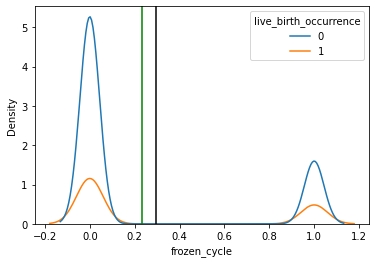

In [27]:
sns.kdeplot(data = dataset, x = "frozen_cycle", hue = "live_birth_occurrence")
plt.axvline(dataset_gagal.frozen_cycle.mean(), 0, 1, color = "g")
plt.axvline(dataset_berhasil.frozen_cycle.mean(), 0, 1, color = "k");

#### 3.2.9. Visualisasi untuk fitur fresh_eggs_collected

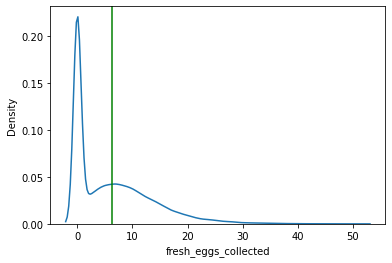

In [28]:
sns.kdeplot(data = dataset, x = "fresh_eggs_collected")
plt.axvline(dataset.fresh_eggs_collected.mean(), 0, 1, color = "g");

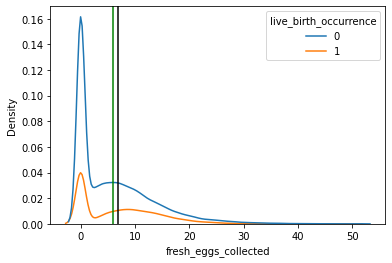

In [29]:
sns.kdeplot(data = dataset, x = "fresh_eggs_collected", hue = "live_birth_occurrence")
plt.axvline(dataset_gagal.fresh_eggs_collected.mean(), 0, 1, color = "g")
plt.axvline(dataset_berhasil.fresh_eggs_collected.mean(), 0, 1, color = "k");

#### 3.2.10. Visualisasi untuk fitur embryos_transfered

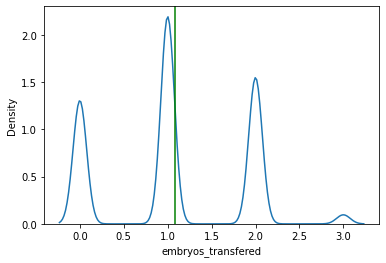

In [30]:
sns.kdeplot(data = dataset, x = "embryos_transfered")
plt.axvline(dataset.embryos_transfered.mean(), 0, 1, color = "g");

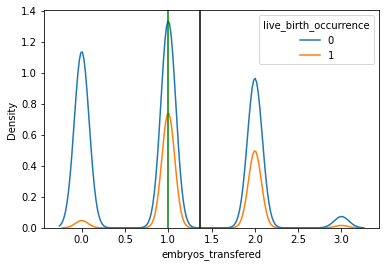

In [31]:
sns.kdeplot(data = dataset, x = "embryos_transfered", hue = "live_birth_occurrence")
plt.axvline(dataset_gagal.embryos_transfered.mean(), 0, 1, color = "g")
plt.axvline(dataset_berhasil.embryos_transfered.mean(), 0, 1, color = "k");

#### 3.2.11. Pearson Corrlation

<AxesSubplot:>

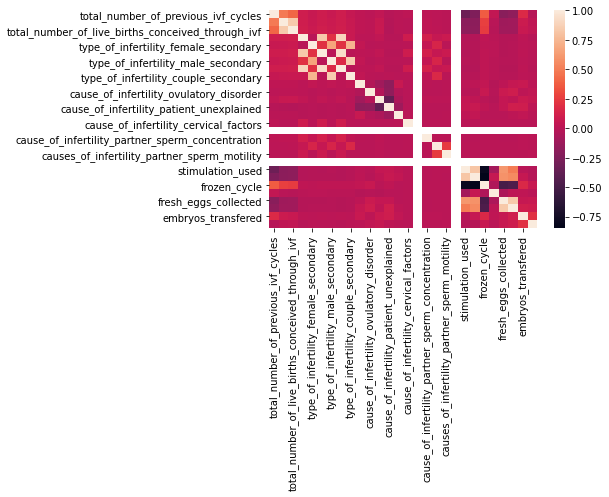

In [35]:
sns.heatmap(dataset.corr())

#### 3.2.12. T Test untuk total_number_of_previous_ivf_cycles

In [37]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    dataset_berhasil[dataset_berhasil.total_number_of_previous_ivf_cycles.isnull() != True].total_number_of_previous_ivf_cycles,
    dataset_gagal[dataset_gagal.total_number_of_previous_ivf_cycles.isnull() != True].total_number_of_previous_ivf_cycles
)

Ttest_indResult(statistic=-4.0856510051549, pvalue=4.398471750000221e-05)

In [38]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(dataset) - 2))

-1.644867570147182

In [39]:
# dengan nilai t-value < t-critical dan nilai p-value < 0.05 maka h0 di reject
# mean antara kelas 0 dan kelas 1 untuk total_number_of_previous_ivf_cycles statistically significant

#### 3.2.13. T Test untuk total_number_of_ivf_pregnancies

In [40]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    dataset_berhasil[dataset_berhasil.total_number_of_ivf_pregnancies.isnull() != True].total_number_of_ivf_pregnancies,
    dataset_gagal[dataset_gagal.total_number_of_ivf_pregnancies.isnull() != True].total_number_of_ivf_pregnancies
)

Ttest_indResult(statistic=8.612878331408567, pvalue=7.217520246247352e-18)

In [41]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(dataset) - 2))

-1.644867570147182

#### 3.2.14 T Test untuk total_number_of_live_births_conceived_through_ivf

In [43]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    dataset_berhasil[dataset_berhasil.total_number_of_live_births_conceived_through_ivf.isnull() != True].total_number_of_live_births_conceived_through_ivf,
    dataset_gagal[dataset_gagal.total_number_of_live_births_conceived_through_ivf.isnull() != True].total_number_of_live_births_conceived_through_ivf
)

Ttest_indResult(statistic=10.029359564211502, pvalue=1.1595199849060631e-23)

In [44]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(dataset) - 2))

-1.644867570147182

#### 3.2.15 T Test untuk stimulation_used

In [46]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    dataset_berhasil[dataset_berhasil.stimulation_used.isnull() != True].stimulation_used,
    dataset_gagal[dataset_gagal.stimulation_used.isnull() != True].stimulation_used
)

Ttest_indResult(statistic=-8.466208141354794, pvalue=2.565902257067515e-17)

In [47]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(dataset) - 2))

-1.644867570147182

In [48]:
# dengan nilai t-value < t-critical dan nilai p-value < 0.05 maka h0 di reject
# mean antara kelas 0 dan kelas 1 untuk stimulation_used statistically significant

#### 3.2.16 T Test untuk fresh_cycle

In [50]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    dataset_berhasil[dataset_berhasil.fresh_cycle.isnull() != True].fresh_cycle,
    dataset_gagal[dataset_gagal.fresh_cycle.isnull() != True].fresh_cycle
)

Ttest_indResult(statistic=-6.275620775540324, pvalue=3.495418582446023e-10)

In [51]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(dataset) - 2))

-1.644867570147182

In [52]:
# dengan nilai t-value < t-critical dan nilai p-value < 0.05 maka h0 di reject
# mean antara kelas 0 dan kelas 1 untuk fresh_cycle statistically significant

#### 3.2.17 T Test untuk frozen_cycle

In [53]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    dataset_berhasil[dataset_berhasil.frozen_cycle.isnull() != True].frozen_cycle,
    dataset_gagal[dataset_gagal.frozen_cycle.isnull() != True].frozen_cycle
)

Ttest_indResult(statistic=20.371300410816744, pvalue=4.461276821330057e-92)

In [54]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(dataset) - 2))

-1.644867570147182

### 3.3. Cek Imbalance Label

In [55]:
dataset.live_birth_occurrence.value_counts()

0    82630
1    26657
Name: live_birth_occurrence, dtype: int64

<AxesSubplot:xlabel='live_birth_occurrence', ylabel='Count'>

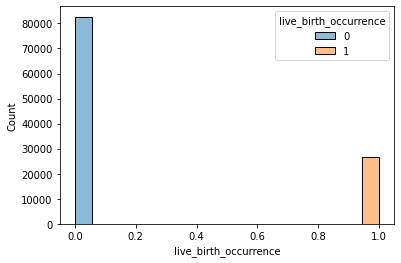

In [57]:
sns.histplot(data = dataset, x = "live_birth_occurrence", hue = "live_birth_occurrence")

### 3.4. Cek Outliers

<AxesSubplot:xlabel='total_number_of_previous_ivf_cycles'>

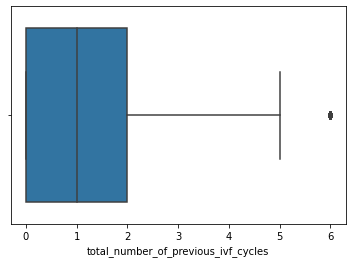

In [58]:
sns.boxplot(data = dataset, x = "total_number_of_previous_ivf_cycles")

<AxesSubplot:xlabel='total_number_of_ivf_pregnancies'>

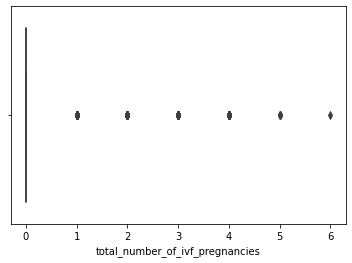

In [59]:
sns.boxplot(data = dataset, x = "total_number_of_ivf_pregnancies")

<AxesSubplot:xlabel='total_number_of_live_births_conceived_through_ivf'>

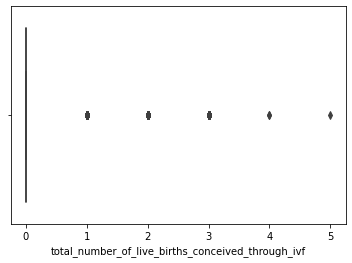

In [60]:
sns.boxplot(data = dataset, x = "total_number_of_live_births_conceived_through_ivf")